# Data Wrangling Project - WeRateDogs
## Insights

In [1]:
#Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lendo o arquivo csv e criando um data frame 
df = pd.read_csv('twitter_archive_master.csv')

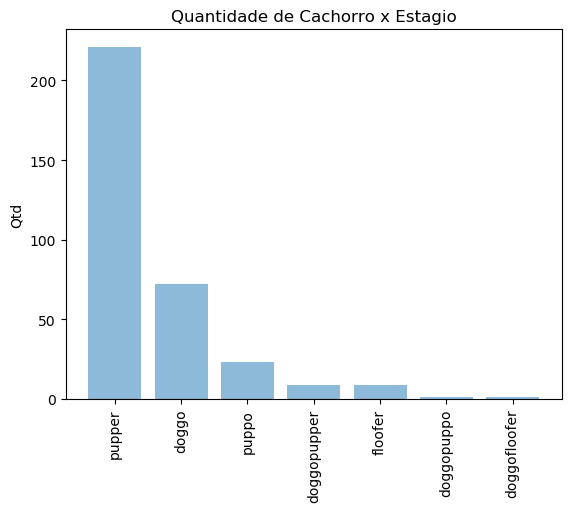

In [3]:
# reset para o padrao do matplotlib
plt.rcdefaults()
# dados para plotar no grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull()].dog_stage.value_counts()
# itens do eixo x
objects = df_count.keys().tolist()
# qtd de pontos do grafico
y_pos = np.arange(len(objects))
# valores do eixo y
performance = df_count.tolist()
 
# criando um grafico de barra
plt.bar(y_pos, performance, align='center', alpha=0.5)
# colocar os valores do eixo X Y
plt.xticks(y_pos, objects)
# defino o label do eixo y
plt.ylabel('Qtd')
# titulo do grafico
plt.title('Quantidade de Cachorro x Estagio')
# rotação dos label do eixo x
plt.xticks(rotation=90)
# mostro o grafico
plt.show()

### Gráfico de Comparação Quantidade de Cachorro x Estágio
- Como pode ser visto no grafico de comparação acima, a maior parte dos cachorros estão classificados no estágio `pupper`, esta classificação representa mais que o dobro das classificações do segundo maior estágio `doggo`, contando com mais de 200 animais nesse estágio.
- Um ponto a se destacar é que existem cachorros com mais de uma classifição, por exemplo, `doggopupper`

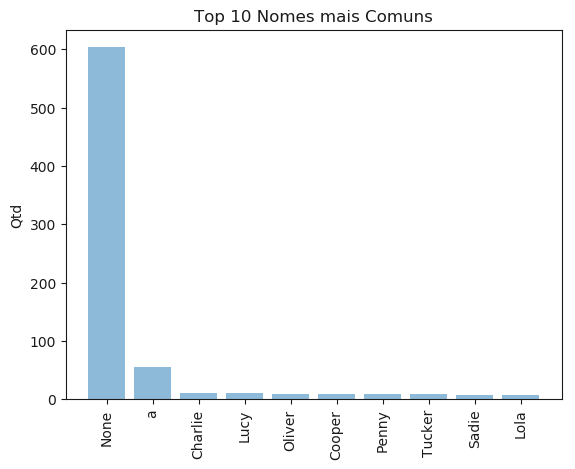

In [117]:
# dados que serao plotados no grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]
# buscando somente o 10 maiores valores (top 10)
df_count = df_count.name.value_counts().nlargest(10)

# criando os valores do eixo X
objects = df_count.keys().tolist()
# qtd de itens a ser plotado no grafico
y_pos = np.arange(len(objects))
# valores de cada ponto no grafico
performance = df_count.tolist()

# crio grafico de barra
plt.bar(y_pos, performance, align='center', alpha=0.5)
# crio o eixo X, com os label e valores do eixo Y
plt.xticks(y_pos, objects)
# label do eixo Y
plt.ylabel('Qtd')
# titulo do grafico
plt.title('Top 10 Nomes mais Comuns')
# rotação do label no eixo X
plt.xticks(rotation=90)
# mostro o grafico
plt.show()

### Gráfico top 10 Nomes mais comuns
- Como pode ser visto a maioria dos tweets não foi possível identificar o nome dos cachorros, o que já era esperado, pois existiam muitos tweets onde a foto tinha mais de 1 cachorro, essa quantidade enorme de tweets sem a classificação do nome leva a distorção da escala do grafico, pois, existem quase 600 tweets sem a classificação do nome, enquanto os demais nomes no Top 10, nao chega nem perto de 100.

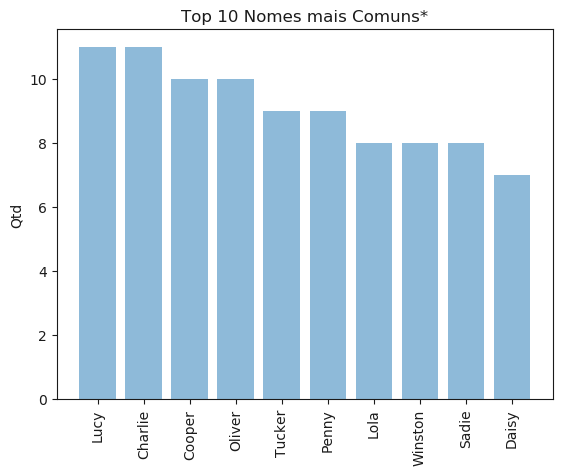

In [124]:
# consulto os valores que serão exibidos no grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]

# busco os 10 maiores valores onde a coluna name seja diferentes de NONE, a, the
df_count = df_count.query("name != 'None' & name != 'a' & name != 'the'").name.value_counts().nlargest(10)

# labels do eixo X
objects = df_count.keys().tolist()
# qtd de itens a ser plotado
y_pos = np.arange(len(objects))
# valores de cada ponto
performance = df_count.tolist()

# crio o grafico
plt.bar(y_pos, performance, align='center', alpha=0.5)
# ploto os valores do eixo Y e os labels do eixo X
plt.xticks(y_pos, objects)
# label do euxo Y
plt.ylabel('Qtd')
# titulo do grafico
plt.title('Top 10 Nomes mais Comuns*')
# rotação do eixo x
plt.xticks(rotation=90)
# mostro o grafico
plt.show()


### Gráfico top 10 Nomes mais comuns
#### Retirando Nomes sem sentido
- Quando se retira do data set os tweets que possuem classificação de nomes sem sentido, tais como: `None` `a` `the` , é possível visualizar novos nomes entrando no Top 10. Nomes como `Daisy` `Winston` não apareciam anteriormente no grafico de Top 10, pois estavam sendo ocultados devido a classificação dos nomes sem sentidos.